In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
dataset = pd.read_csv('NSL_Merged(MultiClass).csv')
dataset.shape

(148517, 42)

In [6]:
dataset.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune


In [7]:
dataset.target.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [8]:
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Data Encoding
for column in dataset:
    unique_vals = np.unique(dataset[column])
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values  for feature {} : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature {} : {}'.format(column, nr_values))

The number of values  for feature duration : 3424
The number of values  for feature protocol_type : 3 -- ['icmp' 'tcp' 'udp']
The number of values  for feature service : 70
The number of values  for feature flag : 11 -- ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
The number of values  for feature src_bytes : 3601
The number of values  for feature dst_bytes : 10401
The number of values  for feature land : 2 -- [0 1]
The number of values  for feature wrong_fragment : 3 -- [0 1 3]
The number of values  for feature urgent : 4 -- [0 1 2 3]
The number of values  for feature hot : 29
The number of values  for feature num_failed_logins : 6 -- [0 1 2 3 4 5]
The number of values  for feature logged_in : 2 -- [0 1]
The number of values  for feature num_compromised : 96
The number of values  for feature root_shell : 2 -- [0 1]
The number of values  for feature su_attempted : 3 -- [0 1 2]
The number of values  for feature num_root : 91
The number of values  for feature num_fi

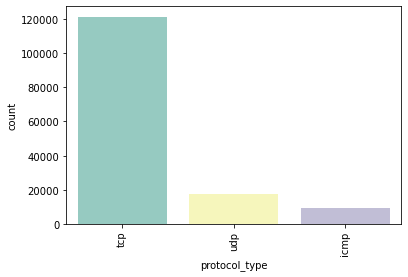

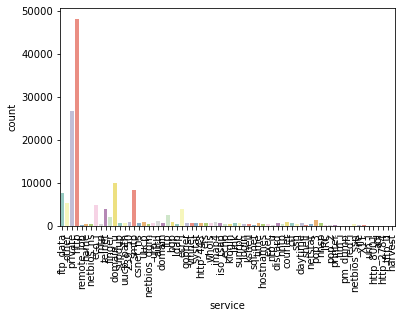

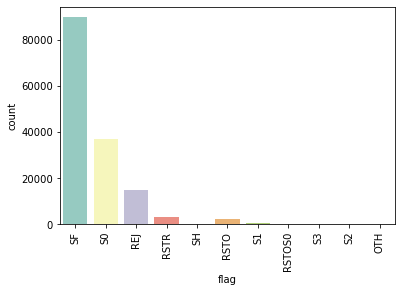

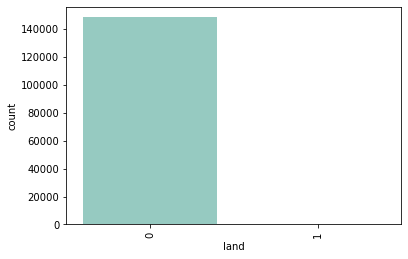

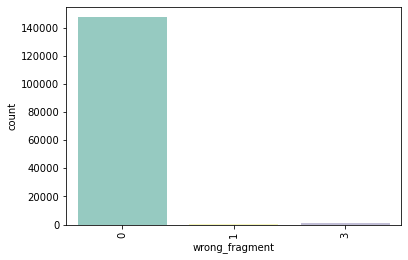

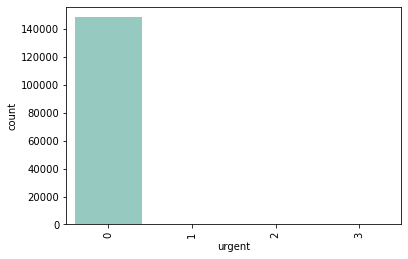

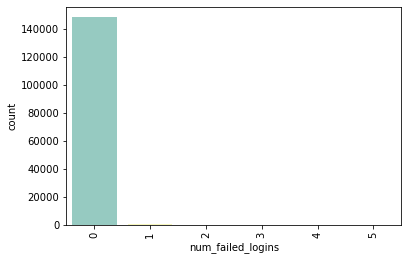

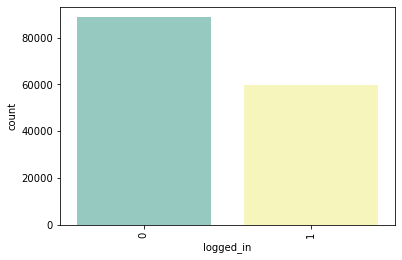

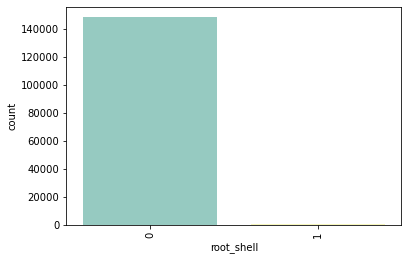

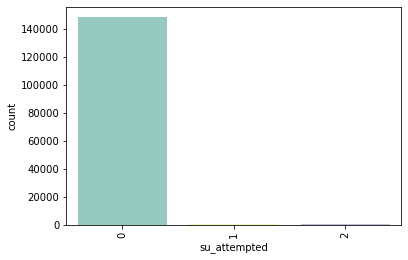

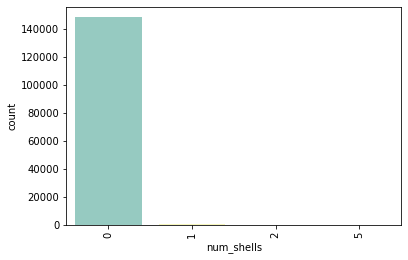

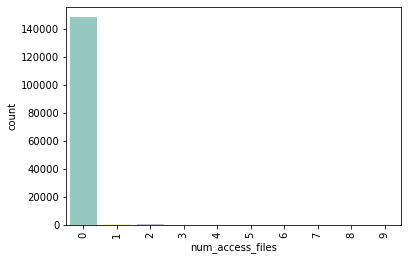

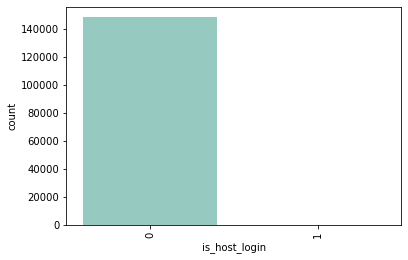

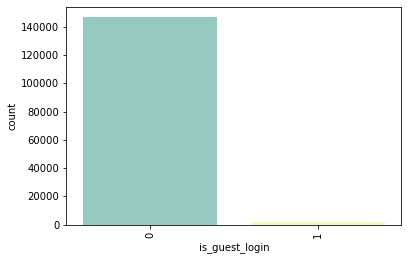

In [11]:
sel_features = ['protocol_type', 'service', 'flag', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', \
                'logged_in','root_shell', 'su_attempted','num_shells','num_access_files','is_host_login','is_guest_login']
for f in sel_features:
    sns.countplot(x = f, data = dataset, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=90)
    plt.show()

In [12]:
# Making categorical variables into numeric representation
print(dataset.shape)

# keeping the columns we need 
raw_data = dataset[sel_features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = sel_features)

# print the shape
print(new_raw_data.shape)
new_raw_data

(148517, 42)
(148517, 14)
(148517, 124)


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148513,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148514,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148515,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
result = pd.concat([dataset, new_raw_data], axis=1)
result

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148513,0,tcp,http,SF,317,938,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,0,0,0,0,0,0,1,0,1,0
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [14]:
#Removing Splited Columns
data1 = result.drop(['protocol_type', 'service', 'flag', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', \
                'logged_in','root_shell', 'su_attempted','num_shells','num_access_files','is_host_login','is_guest_login',\
                 'num_outbound_cmds'], axis=1)
data1

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
0,0,491,0,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,1,0,1,0
1,0,146,0,0,0,0,0,13,1,0.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,123,6,1.0,...,0,0,0,0,0,0,1,0,1,0
3,0,232,8153,0,0,0,0,5,5,0.2,...,0,0,0,0,0,0,1,0,1,0
4,0,199,420,0,0,0,0,30,32,0.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,1,0,1,0
148513,0,317,938,0,0,0,0,2,11,0.0,...,0,0,0,0,0,0,1,0,1,0
148514,0,54540,8314,2,1,0,0,5,10,0.0,...,0,0,0,0,0,0,1,0,1,0
148515,0,42,42,0,0,0,0,4,6,0.0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
data1.shape

(148517, 151)

In [16]:
x = data1.drop(['target'], axis=1)
x

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
0,0,491,0,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,1,0,1,0
1,0,146,0,0,0,0,0,13,1,0.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,123,6,1.0,...,0,0,0,0,0,0,1,0,1,0
3,0,232,8153,0,0,0,0,5,5,0.2,...,0,0,0,0,0,0,1,0,1,0
4,0,199,420,0,0,0,0,30,32,0.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,1,0,1,0
148513,0,317,938,0,0,0,0,2,11,0.0,...,0,0,0,0,0,0,1,0,1,0
148514,0,54540,8314,2,1,0,0,5,10,0.0,...,0,0,0,0,0,0,1,0,1,0
148515,0,42,42,0,0,0,0,4,6,0.0,...,0,0,0,0,0,0,1,0,1,0


In [17]:
x.dtypes

duration              int64
src_bytes             int64
dst_bytes             int64
hot                   int64
num_compromised       int64
                      ...  
num_access_files_9    uint8
is_host_login_0       uint8
is_host_login_1       uint8
is_guest_login_0      uint8
is_guest_login_1      uint8
Length: 150, dtype: object

In [18]:
x = x.astype('int64')
x

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
0,0,491,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,1,0,1,0
1,0,146,0,0,0,0,0,13,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,123,6,1,...,0,0,0,0,0,0,1,0,1,0
3,0,232,8153,0,0,0,0,5,5,0,...,0,0,0,0,0,0,1,0,1,0
4,0,199,420,0,0,0,0,30,32,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
148513,0,317,938,0,0,0,0,2,11,0,...,0,0,0,0,0,0,1,0,1,0
148514,0,54540,8314,2,1,0,0,5,10,0,...,0,0,0,0,0,0,1,0,1,0
148515,0,42,42,0,0,0,0,4,6,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
x = x.values
x

array([[    0,   491,     0, ...,     0,     1,     0],
       [    0,   146,     0, ...,     0,     1,     0],
       [    0,     0,     0, ...,     0,     1,     0],
       ...,
       [    0, 54540,  8314, ...,     0,     1,     0],
       [    0,    42,    42, ...,     0,     1,     0],
       [    0,     0,     0, ...,     0,     1,     0]], dtype=int64)

In [20]:
y = data1['target']
y = y.values
y

array(['normal', 'normal', 'neptune', ..., 'back', 'normal', 'mscan'],
      dtype=object)

In [21]:
print(x.shape)
print(y.shape)

(148517, 150)
(148517,)


In [22]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
#imbalanced Data
data1['target'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
land                  25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
worm                   2
udpstorm               2
sqlattack              2
spy                    2


In [24]:
# Bagging, Adaboost for Ensamble Learning
#Random Forest, Decision Tree(j48)

In [25]:
#Prediction models (NB, RF, SVM, DT)
models = []
#models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('DT', DecisionTreeClassifier()))

Accuracy = []
Pred = []

names = []

for name, model in models:
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred)
    #print('Accuracy: %.3f' % acc)
    
    Accuracy.append(acc)
    Pred.append(pred)
    
    names.append(name)
    print('%s: Accuracy: %.4f' % (name, acc))

RF: Accuracy: 0.9893
DT: Accuracy: 0.9871


In [26]:
print(Accuracy)
print(Pred)

[0.9892719274620702, 0.987094891821528]
[array(['neptune', 'satan', 'neptune', ..., 'neptune', 'ipsweep', 'smurf'],
      dtype=object), array(['neptune', 'satan', 'neptune', ..., 'neptune', 'ipsweep', 'smurf'],
      dtype=object)]


In [27]:
#Accuracy
final_acc = []
final_acc.clear()
final_acc.extend(Accuracy)
final_acc

[0.9892719274620702, 0.987094891821528]

In [28]:
#Predicted Values
final_pred = []
final_pred.clear()
final_pred.extend(Pred)
final_pred

[array(['neptune', 'satan', 'neptune', ..., 'neptune', 'ipsweep', 'smurf'],
       dtype=object),
 array(['neptune', 'satan', 'neptune', ..., 'neptune', 'ipsweep', 'smurf'],
       dtype=object)]

In [29]:
print(names[0] + " " + accuracy_score(y_test, Pred[0]).astype(str))
print(names[1] + " " + accuracy_score(y_test, Pred[1]).astype(str))

RF 0.9892719274620702
DT 0.987094891821528


In [30]:
#pd.crosstab(y_test,Pred[0])

In [31]:
#print(confusion_matrix(y_test, Pred[0]))

In [32]:
print(classification_report(y_test, Pred[0]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       199
           back       1.00      1.00      1.00       370
buffer_overflow       0.77      0.62      0.69        16
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       1.00      0.98      0.99       394
     httptunnel       1.00      1.00      1.00        37
           imap       1.00      1.00      1.00         2
        ipsweep       0.90      0.95      0.93      1105
           land       1.00      0.50      0.67         6
     loadmodule       0.00      0.00      0.00         1
       mailbomb       0.99      0.99      0.99        88
          mscan       0.99      0.99      0.99       314
       multihop       0.67      0.20      0.31        10
          named       0.00      0.00      0.00         5
        neptune       1.00      1.00      1.00     13759
           nmap       0.86      0.77      0.81       465
         normal       0.99    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(classification_report(y_test, Pred[1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

                 precision    recall  f1-score   support

        apache2       0.99      1.00      0.99       199
           back       1.00      0.99      1.00       370
buffer_overflow       0.64      0.56      0.60        16
      ftp_write       1.00      0.33      0.50         3
   guess_passwd       0.99      0.99      0.99       394
     httptunnel       0.93      1.00      0.96        37
           imap       1.00      0.50      0.67         2
        ipsweep       0.91      0.90      0.91      1105
           land       0.80      0.67      0.73         6
     loadmodule       0.00      0.00      0.00         1
       mailbomb       1.00      1.00      1.00        88
          mscan       0.99      0.99      0.99       314
       multihop       0.50      0.20      0.29        10
          named       0.43      0.60      0.50         5
        neptune       1.00      1.00      1.00     13759
           nmap       0.78      0.79      0.78       465
         normal       0.99    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
data1

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
0,0,491,0,0,0,0,0,2,2,0.0,...,0,0,0,0,0,0,1,0,1,0
1,0,146,0,0,0,0,0,13,1,0.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,123,6,1.0,...,0,0,0,0,0,0,1,0,1,0
3,0,232,8153,0,0,0,0,5,5,0.2,...,0,0,0,0,0,0,1,0,1,0
4,0,199,420,0,0,0,0,30,32,0.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,1,0,1,0
148513,0,317,938,0,0,0,0,2,11,0.0,...,0,0,0,0,0,0,1,0,1,0
148514,0,54540,8314,2,1,0,0,5,10,0.0,...,0,0,0,0,0,0,1,0,1,0
148515,0,42,42,0,0,0,0,4,6,0.0,...,0,0,0,0,0,0,1,0,1,0


In [35]:
data1.shape

(148517, 151)

In [36]:
#GAN working starts here

In [37]:
data5 = data1.copy()

In [38]:
#Smote on samples (Previous 34 removed here. On remaining 6 will be applied GAN).


data5.drop(data5[data5['target'] == 'smurf'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'neptune'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'normal'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'back'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'satan'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'ipsweep'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'portsweep'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'nmap'].index, inplace = True) 

data5.drop(data5[data5['target'] == 'guess_passwd'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'warezclient'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'teardrop'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'pod'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'buffer_overflow'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'land'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'warezmaster'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'imap'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'rootkit'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'loadmodule'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'ftp_write'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'mscan'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'apache2'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'processtable'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'snmpguess'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'saint'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'mailbomb'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'snmpgetattack'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'httptunnel'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'multihop'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'named'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'ps'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'xlock'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'sendmail'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'xterm'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'phf'].index, inplace = True) 

print(data5['target'].unique())
print(len(data5['target'].unique()))

x55 = data5.drop(['target'], axis=1)
x5 = x55.astype('int64')
x5 = x5.values
print(x5)

y55 = data5['target']
y5 = y55.values
print(y5)

['spy' 'perl' 'worm' 'xsnoop' 'sqlattack' 'udpstorm']
6
[[  299   112   847 ...     0     1     0]
 [  337   237  1540 ...     0     1     0]
 [   25   269  2333 ...     0     1     0]
 ...
 [  469  1360 17984 ...     0     1     0]
 [  171   261  1829 ...     1     1     0]
 [   43   260  2611 ...     0     1     0]]
['spy' 'spy' 'perl' 'perl' 'perl' 'worm' 'perl' 'xsnoop' 'sqlattack'
 'sqlattack' 'udpstorm' 'worm' 'udpstorm' 'xsnoop' 'xsnoop' 'xsnoop'
 'perl']


In [39]:
data6 = data1.copy()

In [40]:
#Data 6 will be merged with GAN output 'samples1'.

data6.drop(data6[data6['target'] == 'perl'].index, inplace = True) 
data6.drop(data6[data6['target'] == 'xsnoop'].index, inplace = True) 
data6.drop(data6[data6['target'] == 'sqlattack'].index, inplace = True) 
data6.drop(data6[data6['target'] == 'spy'].index, inplace = True)
data6.drop(data6[data6['target'] == 'udpstorm'].index, inplace = True)
data6.drop(data6[data6['target'] == 'worm'].index, inplace = True)

print(data6['target'].unique())
print(len(data6['target'].unique()))

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'saint' 'mscan' 'apache2' 'snmpgetattack' 'processtable'
 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named' 'sendmail' 'xterm'
 'xlock']
34


In [41]:
x66 = data6.drop(['target'], axis=1)
x6 = x66.astype('int64')
x6 = x6.values
print(x6)

[[    0   491     0 ...     0     1     0]
 [    0   146     0 ...     0     1     0]
 [    0     0     0 ...     0     1     0]
 ...
 [    0 54540  8314 ...     0     1     0]
 [    0    42    42 ...     0     1     0]
 [    0     0     0 ...     0     1     0]]


In [42]:
y66 = data6['target']
y6 = y66.values
print(y6)

['normal' 'normal' 'neptune' ... 'back' 'normal' 'mscan']


In [43]:
print(data1.shape)
print(data5.shape)
print(data6.shape)

(148517, 151)
(17, 151)
(148500, 151)


In [44]:
print(x.shape)
print(y.shape)

(148517, 150)
(148517,)


In [45]:
print(x5.shape)
print(y5.shape)

(17, 150)
(17,)


In [46]:
print(x6.shape)
print(y6.shape)

(148500, 150)
(148500,)


In [47]:
y55

21445           spy
64331           spy
66007          perl
69147          perl
101585         perl
129084         worm
130140         perl
131255       xsnoop
131451    sqlattack
134098    sqlattack
134673     udpstorm
143598         worm
146016     udpstorm
146867       xsnoop
147251       xsnoop
147583       xsnoop
148058         perl
Name: target, dtype: object

In [48]:
y56 = pd.DataFrame(y55)
y56

,target
21445,spy
64331,spy
66007,perl
69147,perl
101585,perl
129084,worm
130140,perl
131255,xsnoop
131451,sqlattack
134098,sqlattack


In [49]:
y56 = y56.rename(columns={"target":"Class"})
y56

,Class
21445,spy
64331,spy
66007,perl
69147,perl
101585,perl
129084,worm
130140,perl
131255,xsnoop
131451,sqlattack
134098,sqlattack


In [50]:
#Concatinate both x55 and y56.
frames = [x55, y56]
con_data5 = pd.concat(frames, axis=1)
con_data5

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1,Class
21445,299,112,847,0,0,0,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,spy
64331,337,237,1540,0,0,0,1,1,1,0.0,...,0,0,0,0,0,1,0,1,0,spy
66007,25,269,2333,0,0,2,2,1,1,0.0,...,0,0,0,0,0,1,0,1,0,perl
69147,54,260,2635,0,0,2,2,1,1,0.0,...,0,0,0,0,0,1,0,1,0,perl
101585,45,268,2364,0,0,2,2,1,1,0.0,...,0,0,0,0,0,1,0,1,0,perl
129084,9,4209,7919,0,0,0,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,worm
130140,40,258,2625,0,0,0,2,1,1,0.0,...,0,0,0,0,0,1,0,1,0,perl
131255,0,1256,11240,0,0,0,0,1,1,1.0,...,0,0,0,0,0,1,0,1,0,xsnoop
131451,2,398,3881,1,0,4,3,1,1,0.0,...,0,0,0,0,0,1,0,1,0,sqlattack
134098,2,398,3881,1,0,4,3,1,1,0.0,...,0,0,0,0,0,1,0,1,0,sqlattack


In [51]:
discrete_columns = ['Class']
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(con_data5, discrete_columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword ar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clust

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clust

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,


In [72]:
samples1 = ctgan.sample(70)
samples1

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1,Class
0,21,6202,6946,0,0,0,1,0,1,1.400411,...,0,0,0,0,0,0,0,0,0,udpstorm
1,150,978,9591,0,0,6,0,1,0,0.038346,...,0,0,0,0,0,1,0,1,0,udpstorm
2,-7,1281,8061,0,0,1,2,0,1,0.526008,...,0,0,0,0,0,0,0,1,0,worm
3,48,4717,6071,0,0,0,3,0,1,0.774205,...,0,0,0,0,0,0,0,0,0,xsnoop
4,58,444,4606,0,0,-1,0,1,1,0.047888,...,0,0,0,0,0,1,0,1,0,worm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,77,197,10161,0,0,0,0,1,1,0.139550,...,0,0,0,0,0,1,1,1,0,spy
66,61,91,4984,0,0,-1,0,1,0,0.485767,...,0,0,0,0,0,0,0,1,0,perl
67,32,1336,7214,0,0,0,0,1,0,0.126735,...,0,0,0,0,0,0,0,1,0,udpstorm
68,74,1336,4677,0,0,2,1,0,1,0.132173,...,0,0,0,0,0,0,0,1,0,worm


In [73]:
samples1['Class'].value_counts()

perl         18
udpstorm     15
xsnoop       11
spy           9
sqlattack     9
worm          8
Name: Class, dtype: int64

In [74]:
y66

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
148512     normal
148513     normal
148514       back
148515     normal
148516      mscan
Name: target, Length: 148500, dtype: object

In [75]:
y67 = pd.DataFrame(y66)
y67

,target
0,normal
1,normal
2,neptune
3,normal
4,normal
...,...
148512,normal
148513,normal
148514,back
148515,normal


In [76]:
y67 = y67.rename(columns={"target":"Class"})
y67

,Class
0,normal
1,normal
2,neptune
3,normal
4,normal
...,...
148512,normal
148513,normal
148514,back
148515,normal


In [77]:
#Concatinate both x66 and y66.
frames = [x66, y67]
con_data6 = pd.concat(frames, axis=1)
con_data6

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1,Class
0,0,491,0,0,0,0,0,2,2,0.0,...,0,0,0,0,0,1,0,1,0,normal
1,0,146,0,0,0,0,0,13,1,0.0,...,0,0,0,0,0,1,0,1,0,normal
2,0,0,0,0,0,0,0,123,6,1.0,...,0,0,0,0,0,1,0,1,0,neptune
3,0,232,8153,0,0,0,0,5,5,0.2,...,0,0,0,0,0,1,0,1,0,normal
4,0,199,420,0,0,0,0,30,32,0.0,...,0,0,0,0,0,1,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,normal
148513,0,317,938,0,0,0,0,2,11,0.0,...,0,0,0,0,0,1,0,1,0,normal
148514,0,54540,8314,2,1,0,0,5,10,0.0,...,0,0,0,0,0,1,0,1,0,back
148515,0,42,42,0,0,0,0,4,6,0.0,...,0,0,0,0,0,1,0,1,0,normal


In [78]:
#Merge Smote results with Data 6
frames = [con_data6, samples1]
merge6 = pd.concat(frames)
#merge1.columns = [column_names]
merge6 = merge6.reset_index(drop=True)
merge6

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1,Class
0,0,491,0,0,0,0,0,2,2,0.000000,...,0,0,0,0,0,1,0,1,0,normal
1,0,146,0,0,0,0,0,13,1,0.000000,...,0,0,0,0,0,1,0,1,0,normal
2,0,0,0,0,0,0,0,123,6,1.000000,...,0,0,0,0,0,1,0,1,0,neptune
3,0,232,8153,0,0,0,0,5,5,0.200000,...,0,0,0,0,0,1,0,1,0,normal
4,0,199,420,0,0,0,0,30,32,0.000000,...,0,0,0,0,0,1,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148565,77,197,10161,0,0,0,0,1,1,0.139550,...,0,0,0,0,0,1,1,1,0,spy
148566,61,91,4984,0,0,-1,0,1,0,0.485767,...,0,0,0,0,0,0,0,1,0,perl
148567,32,1336,7214,0,0,0,0,1,0,0.126735,...,0,0,0,0,0,0,0,1,0,udpstorm
148568,74,1336,4677,0,0,2,1,0,1,0.132173,...,0,0,0,0,0,0,0,1,0,worm


In [79]:
merge6['Class'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
perl                  18
named                 17
ps                    15
udpstorm              15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xsnoop                11
sqlattack              9
spy                    9
xlock                  9
worm                   8
phf                    6


In [80]:
#SMOTE working starts here

In [81]:
data3 = merge6.copy()

In [82]:
#Smote on samples (sample values greater than 6 and lower than 1285). 
#So all sample variables will have more than 1000 records per sample 
#9 samples removed, 31 left for SMOTE

data3.drop(data3[data3['Class'] == 'smurf'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'neptune'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'normal'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'back'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'satan'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'ipsweep'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'portsweep'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'nmap'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'guess_passwd'].index, inplace = True) 

print(data3['Class'].unique())
print(len(data3['Class'].unique()))

x33 = data3.drop(['Class'], axis=1)
x3 = x33.astype('int64')
x3 = x3.values
print(x3)

y3 = data3['Class']
y3 = y3.values
print(y3)

['warezclient' 'teardrop' 'pod' 'ftp_write' 'multihop' 'rootkit'
 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land' 'loadmodule' 'saint'
 'mscan' 'apache2' 'snmpgetattack' 'processtable' 'httptunnel' 'ps'
 'snmpguess' 'mailbomb' 'named' 'sendmail' 'xterm' 'xlock' 'udpstorm'
 'worm' 'xsnoop' 'perl' 'sqlattack' 'spy']
31
[[    0   334     0 ...     0     1     0]
 [    0    28     0 ...     0     1     0]
 [    0   334     0 ...     0     1     0]
 ...
 [   32  1336  7214 ...     0     1     0]
 [   74  1336  4677 ...     0     1     0]
 [  112   274 14982 ...     0     1     0]]
['warezclient' 'teardrop' 'warezclient' ... 'udpstorm' 'worm' 'worm']


In [83]:
data4 = merge6.copy()

In [84]:
#Smote on samples (Previous 9 removed here. So that Data4 will be merged with the smote output of 9).

data4.drop(data4[data4['Class'] == 'warezclient'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'teardrop'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'pod'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'warezmaster'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'mscan'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'apache2'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'processtable'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'snmpguess'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'saint'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'mailbomb'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'snmpgetattack'].index, inplace = True) 

data4.drop(data4[data4['Class'] == 'buffer_overflow'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'land'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'imap'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'rootkit'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'loadmodule'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'ftp_write'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'httptunnel'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'multihop'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'named'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'ps'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'xlock'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'sendmail'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'xterm'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'phf'].index, inplace = True) 

data4.drop(data4[data4['Class'] == 'perl'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'xsnoop'].index, inplace = True)
data4.drop(data4[data4['Class'] == 'sqlattack'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'spy'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'udpstorm'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'worm'].index, inplace = True)


print(data4['Class'].unique())
print(len(data4['Class'].unique()))

['normal' 'neptune' 'ipsweep' 'portsweep' 'nmap' 'satan' 'smurf' 'back'
 'guess_passwd']
9


In [85]:
print(x3.shape)
print(y3.shape)

(6973, 150)
(6973,)


In [86]:
print(data3.shape)
print(data4.shape)

(6973, 151)
(141597, 151)


In [87]:
#Test Train Split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=0)

In [88]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
from collections import Counter

In [89]:
X_S3, y_S3 = smote.fit_resample(x3,y3)

In [90]:
print(X_S3.shape)
print(y_S3.shape)

(30876, 150)
(30876,)


In [91]:
x33

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_4,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1
13,0,334,0,0,0,0,0,2,2,0.000000,...,0,0,0,0,0,0,1,0,1,0
46,0,28,0,0,0,0,0,80,80,0.000000,...,0,0,0,0,0,0,1,0,1,0
48,0,334,0,0,0,0,0,2,2,0.000000,...,0,0,0,0,0,0,1,0,1,0
52,0,28,0,0,0,0,0,2,2,0.000000,...,0,0,0,0,0,0,1,0,1,0
104,0,28,0,0,0,0,0,82,82,0.000000,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148565,77,197,10161,0,0,0,0,1,1,0.139550,...,0,0,0,0,0,0,1,1,1,0
148566,61,91,4984,0,0,-1,0,1,0,0.485767,...,0,0,0,0,0,0,0,0,1,0
148567,32,1336,7214,0,0,0,0,1,0,0.126735,...,0,0,0,0,0,0,0,0,1,0
148568,74,1336,4677,0,0,2,1,0,1,0.132173,...,0,0,0,0,0,0,0,0,1,0


In [92]:
x33.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised',
       'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate',
       ...
       'num_access_files_4', 'num_access_files_5', 'num_access_files_6',
       'num_access_files_7', 'num_access_files_8', 'num_access_files_9',
       'is_host_login_0', 'is_host_login_1', 'is_guest_login_0',
       'is_guest_login_1'],
      dtype='object', length=150)

In [93]:
column_names = list(x33.columns)
print(len(column_names))
column_names

150


['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'servi

In [94]:
X_S3

array([[    0,   334,     0, ...,     0,     1,     0],
       [    0,    28,     0, ...,     0,     1,     0],
       [    0,   334,     0, ...,     0,     1,     0],
       ...,
       [  216,  2851,  3504, ...,     0,     1,     0],
       [   62,  2453,  1807, ...,     0,     1,     0],
       [   56,  3292, 35798, ...,     0,     1,     0]], dtype=int64)

In [95]:
data_new = pd.DataFrame(X_S3)
#data_new.columns =[column_names]
data_new

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,334,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,1,0,1,0
1,0,28,0,0,0,0,0,80,80,0,...,0,0,0,0,0,0,1,0,1,0
2,0,334,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,1,0,1,0
3,0,28,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,1,0,1,0
4,0,28,0,0,0,0,0,82,82,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30871,16,2442,924,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
30872,87,3732,27830,2,23,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
30873,216,2851,3504,1,2,4,2,1,1,0,...,0,0,0,0,0,0,1,0,1,0
30874,62,2453,1807,0,3,5,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [96]:
data_class = pd.DataFrame(y_S3)
#data_class = data_class.rename(columns={ 0:"Class"})
data_class

,0
0,warezclient
1,teardrop
2,warezclient
3,teardrop
4,teardrop
...,...
30871,xterm
30872,xterm
30873,xterm
30874,xterm


In [97]:
column_names += ['Class']
print(len(column_names))
column_names

151


['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_aol',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'servi

In [98]:
frames = [data_new, data_class]
final_data = pd.concat(frames, axis=1)
final_data.columns =[column_names]
final_data = final_data.reset_index(drop=True)
final_data

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_5,num_access_files_6,num_access_files_7,num_access_files_8,num_access_files_9,is_host_login_0,is_host_login_1,is_guest_login_0,is_guest_login_1,Class
0,0,334,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,warezclient
1,0,28,0,0,0,0,0,80,80,0,...,0,0,0,0,0,1,0,1,0,teardrop
2,0,334,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,warezclient
3,0,28,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,teardrop
4,0,28,0,0,0,0,0,82,82,0,...,0,0,0,0,0,1,0,1,0,teardrop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30871,16,2442,924,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
30872,87,3732,27830,2,23,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
30873,216,2851,3504,1,2,4,2,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
30874,62,2453,1807,0,3,5,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm


In [99]:
print("Before Smote :", Counter(y3))
print("After Smote :", Counter(y_S3))

Before Smote : Counter({'mscan': 996, 'warezmaster': 964, 'teardrop': 904, 'warezclient': 890, 'apache2': 737, 'processtable': 685, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'pod': 242, 'snmpgetattack': 178, 'httptunnel': 133, 'buffer_overflow': 50, 'multihop': 25, 'land': 25, 'rootkit': 23, 'perl': 18, 'named': 17, 'ps': 15, 'udpstorm': 15, 'sendmail': 14, 'xterm': 13, 'imap': 12, 'ftp_write': 11, 'loadmodule': 11, 'xsnoop': 11, 'xlock': 9, 'sqlattack': 9, 'spy': 9, 'worm': 8, 'phf': 6})
After Smote : Counter({'warezclient': 996, 'teardrop': 996, 'pod': 996, 'ftp_write': 996, 'multihop': 996, 'rootkit': 996, 'buffer_overflow': 996, 'imap': 996, 'warezmaster': 996, 'phf': 996, 'land': 996, 'loadmodule': 996, 'saint': 996, 'mscan': 996, 'apache2': 996, 'snmpgetattack': 996, 'processtable': 996, 'httptunnel': 996, 'ps': 996, 'snmpguess': 996, 'mailbomb': 996, 'named': 996, 'sendmail': 996, 'xterm': 996, 'xlock': 996, 'udpstorm': 996, 'worm': 996, 'xsnoop': 996, 'perl': 996, 'sqlat

In [100]:
print(data4.shape)
print(final_data.shape)

(141597, 151)
(30876, 151)


In [101]:
a = data4.values
a = pd.DataFrame(a)
b = final_data.values
b = pd.DataFrame(b)

In [102]:
a

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0,491,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,normal
1,0,146,0,0,0,0,0,13,1,0,...,0,0,0,0,0,1,0,1,0,normal
2,0,0,0,0,0,0,0,123,6,1,...,0,0,0,0,0,1,0,1,0,neptune
3,0,232,8153,0,0,0,0,5,5,0.2,...,0,0,0,0,0,1,0,1,0,normal
4,0,199,420,0,0,0,0,30,32,0,...,0,0,0,0,0,1,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141592,0,1032,0,0,0,0,0,53,53,0,...,0,0,0,0,0,1,0,1,0,smurf
141593,0,794,333,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,normal
141594,0,317,938,0,0,0,0,2,11,0,...,0,0,0,0,0,1,0,1,0,normal
141595,0,54540,8314,2,1,0,0,5,10,0,...,0,0,0,0,0,1,0,1,0,back


In [103]:
b

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0,334,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,warezclient
1,0,28,0,0,0,0,0,80,80,0,...,0,0,0,0,0,1,0,1,0,teardrop
2,0,334,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,warezclient
3,0,28,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,teardrop
4,0,28,0,0,0,0,0,82,82,0,...,0,0,0,0,0,1,0,1,0,teardrop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30871,16,2442,924,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
30872,87,3732,27830,2,23,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
30873,216,2851,3504,1,2,4,2,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
30874,62,2453,1807,0,3,5,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm


In [104]:
#Merge Smote results with Data 4
frames = [a, b]
merge1 = pd.concat(frames)
#merge1.columns = [column_names]
merge1 = merge1.reset_index(drop=True)
merge1

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0,491,0,0,0,0,0,2,2,0,...,0,0,0,0,0,1,0,1,0,normal
1,0,146,0,0,0,0,0,13,1,0,...,0,0,0,0,0,1,0,1,0,normal
2,0,0,0,0,0,0,0,123,6,1,...,0,0,0,0,0,1,0,1,0,neptune
3,0,232,8153,0,0,0,0,5,5,0.2,...,0,0,0,0,0,1,0,1,0,normal
4,0,199,420,0,0,0,0,30,32,0,...,0,0,0,0,0,1,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172468,16,2442,924,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
172469,87,3732,27830,2,23,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
172470,216,2851,3504,1,2,4,2,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm
172471,62,2453,1807,0,3,5,0,1,1,0,...,0,0,0,0,0,1,0,1,0,xterm


In [105]:
#new_df = pd.DataFrame(merge1)
#new_df.shape

In [106]:
col = ['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 'service_http',
 'service_http_443',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_private',
 'service_red_i',
 'service_remote_job',
 'service_rje',
 'service_shell',
 'service_smtp',
 'service_sql_net',
 'service_ssh',
 'service_sunrpc',
 'service_supdup',
 'service_systat',
 'service_telnet',
 'service_tftp_u',
 'service_tim_i',
 'service_time',
 'service_urh_i',
 'service_urp_i',
 'service_uucp',
 'service_uucp_path',
 'service_vmnet',
 'service_whois',
 'flag_OTH',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTOS0',
 'flag_RSTR',
 'flag_S0',
 'flag_S1',
 'flag_S2',
 'flag_S3',
 'flag_SF',
 'flag_SH',
 'land_0',
 'land_1',
 'wrong_fragment_0',
 'wrong_fragment_1',
 'wrong_fragment_3',
 'urgent_0',
 'urgent_1',
 'urgent_2',
 'urgent_3',
 'num_failed_logins_0',
 'num_failed_logins_1',
 'num_failed_logins_2',
 'num_failed_logins_3',
 'num_failed_logins_4',
 'num_failed_logins_5',
 'logged_in_0',
 'logged_in_1',
 'root_shell_0',
 'root_shell_1',
 'su_attempted_0',
 'su_attempted_1',
 'su_attempted_2',
 'num_shells_0',
 'num_shells_1',
 'num_shells_2',
 'num_access_files_0',
 'num_access_files_1',
 'num_access_files_2',
 'num_access_files_3',
 'num_access_files_4',
 'num_access_files_6',
 'num_access_files_8',
 'is_hot_login_0',
 'is_guest_login_0',
 'is_guest_login_1',
 'Class']
col

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 

In [107]:
converted_list = []

for element in col:
    converted_list.append(element.strip())

print(len(converted_list))
print(converted_list)

142
['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_im

In [108]:
#new_df.columns = [converted_list]

In [109]:
#new_df

In [110]:
#new1_df = new_df.copy()
#new1_df

In [111]:
xnn = merge1.drop([150], axis=1)
xn = xnn.astype('int64')
xn = xn.values
print(xn)

ynn = merge1[150]
yn = ynn.values
print(yn)

[[    0   491     0 ...     0     1     0]
 [    0   146     0 ...     0     1     0]
 [    0     0     0 ...     0     1     0]
 ...
 [  216  2851  3504 ...     0     1     0]
 [   62  2453  1807 ...     0     1     0]
 [   56  3292 35798 ...     0     1     0]]
['normal' 'normal' 'neptune' ... 'xterm' 'xterm' 'xterm']


In [112]:
print(xn.shape)
print(yn.shape)

(172473, 150)
(172473,)


In [113]:
#Test Train Split
X_train33, X_test33, y_train33, y_test33 = train_test_split(xn, yn, test_size=0.3, random_state=0)

In [114]:
print(X_train33.shape)
print(X_test33.shape)
print(y_train33.shape)
print(y_test33.shape)

(120731, 150)
(51742, 150)
(120731,)
(51742,)


In [115]:
#Prediction models (RF)
models_S = RandomForestClassifier()
models_S.fit(X_train33, y_train33)
pred_S = models_S.predict(X_test33)
acc_S = accuracy_score(y_test33, pred_S)
print('RF Accuracy: %.4f' % (acc_S))

RF Accuracy: 0.9890


In [116]:
print(classification_report(y_test33, pred_S))

                 precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       331
           back       1.00      1.00      1.00       394
buffer_overflow       0.99      0.99      0.99       316
      ftp_write       1.00      1.00      1.00       315
   guess_passwd       1.00      0.99      1.00       417
     httptunnel       1.00      0.99      1.00       284
           imap       1.00      1.00      1.00       288
        ipsweep       0.90      0.95      0.92      1072
           land       0.99      1.00      1.00       310
     loadmodule       1.00      1.00      1.00       308
       mailbomb       1.00      1.00      1.00       291
          mscan       0.99      1.00      1.00       285
       multihop       1.00      0.99      0.99       297
          named       1.00      1.00      1.00       317
        neptune       1.00      1.00      1.00     13898
           nmap       0.86      0.75      0.81       459
         normal       0.99    

In [117]:
merge1[150].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
pod                  996
phf                  996
sqlattack            996
rootkit              996
warezmaster          996
loadmodule           996
multihop             996
warezclient          996
perl                 996
processtable         996
worm                 996
ps                   996
saint                996
snmpgetattack        996
snmpguess            996
buffer_overflow      996
sendmail             996
named                996
apache2              996
ftp_write            996
teardrop             996
xsnoop               996
mscan                996
land                 996
mailbomb             996
udpstorm             996
xterm                996
imap                 996
spy                  996
xlock                996
httptunnel           996


In [118]:
#Prediction models (DT)
models_S = DecisionTreeClassifier()
models_S.fit(X_train33, y_train33)
pred_S = models_S.predict(X_test33)
acc_S = accuracy_score(y_test33, pred_S)
print('RF Accuracy: %.4f' % (acc_S))

RF Accuracy: 0.9850


In [119]:
print(classification_report(y_test33, pred_S))

                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00       331
           back       0.99      0.99      0.99       394
buffer_overflow       0.99      0.96      0.98       316
      ftp_write       0.98      0.99      0.99       315
   guess_passwd       0.99      0.99      0.99       417
     httptunnel       0.98      0.98      0.98       284
           imap       1.00      1.00      1.00       288
        ipsweep       0.91      0.91      0.91      1072
           land       0.99      1.00      1.00       310
     loadmodule       0.99      1.00      0.99       308
       mailbomb       1.00      1.00      1.00       291
          mscan       0.98      0.97      0.98       285
       multihop       0.98      0.97      0.97       297
          named       0.99      0.99      0.99       317
        neptune       1.00      1.00      1.00     13898
           nmap       0.79      0.78      0.79       459
         normal       0.99    

In [120]:
np.unique(y_test33)

array(['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd',
       'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb',
       'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl',
       'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit',
       'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack',
       'snmpguess', 'spy', 'sqlattack', 'teardrop', 'udpstorm',
       'warezclient', 'warezmaster', 'worm', 'xlock', 'xsnoop', 'xterm'],
      dtype=object)

In [121]:
np.unique(y_train33)

array(['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd',
       'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb',
       'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl',
       'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit',
       'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack',
       'snmpguess', 'spy', 'sqlattack', 'teardrop', 'udpstorm',
       'warezclient', 'warezmaster', 'worm', 'xlock', 'xsnoop', 'xterm'],
      dtype=object)

# Bagging

In [125]:
#bagging on Random Forest
from sklearn.ensemble import BaggingClassifier
bagging_R = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

In [126]:
bagging_R.fit(X_train33, y_train33)
pred_BR = bagging_R.predict(X_test33)
acc_BR = accuracy_score(y_test33, pred_BR)
print('RF Accuracy: %.4f' % (acc_BR))

RF Accuracy: 0.9893


In [127]:
print(classification_report(y_test33, pred_BR))

                 precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       331
           back       1.00      1.00      1.00       394
buffer_overflow       0.99      0.99      0.99       316
      ftp_write       1.00      1.00      1.00       315
   guess_passwd       1.00      0.99      0.99       417
     httptunnel       0.99      0.99      0.99       284
           imap       1.00      1.00      1.00       288
        ipsweep       0.90      0.97      0.93      1072
           land       0.99      1.00      1.00       310
     loadmodule       1.00      1.00      1.00       308
       mailbomb       1.00      1.00      1.00       291
          mscan       0.99      1.00      0.99       285
       multihop       1.00      0.99      0.99       297
          named       0.99      1.00      1.00       317
        neptune       1.00      1.00      1.00     13898
           nmap       0.91      0.75      0.82       459
         normal       0.99    

In [128]:
#Bagging on Decision Tree
bagging_D = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10, random_state=0)

In [129]:
bagging_D.fit(X_train33, y_train33)
pred_BD = bagging_D.predict(X_test33)
acc_BD = accuracy_score(y_test33, pred_BD)
print('RF Accuracy: %.4f' % (acc_BD))

RF Accuracy: 0.9872


In [136]:
print(classification_report(y_test33, pred_BD))

                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00       331
           back       0.99      0.99      0.99       394
buffer_overflow       0.99      0.97      0.98       316
      ftp_write       0.98      0.99      0.99       315
   guess_passwd       1.00      0.99      0.99       417
     httptunnel       0.98      0.98      0.98       284
           imap       1.00      1.00      1.00       288
        ipsweep       0.90      0.94      0.92      1072
           land       0.99      1.00      1.00       310
     loadmodule       0.99      1.00      1.00       308
       mailbomb       1.00      1.00      1.00       291
          mscan       1.00      0.99      0.99       285
       multihop       0.98      0.98      0.98       297
          named       0.98      0.99      0.98       317
        neptune       1.00      1.00      1.00     13898
           nmap       0.86      0.76      0.81       459
         normal       0.99    

# Adaboost

In [130]:
#Adaboost on Random Forest
from sklearn.ensemble import AdaBoostClassifier
adboost_R = AdaBoostClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

In [131]:
adboost_R.fit(X_train33, y_train33)
pred_AR = adboost_R.predict(X_test33)
acc_AR = accuracy_score(y_test33, pred_AR)
print('RF Accuracy: %.4f' % (acc_AR))

RF Accuracy: 0.9891


In [132]:
print(classification_report(y_test33, pred_AR))

                 precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       331
           back       1.00      1.00      1.00       394
buffer_overflow       0.99      0.99      0.99       316
      ftp_write       1.00      1.00      1.00       315
   guess_passwd       1.00      0.99      1.00       417
     httptunnel       1.00      0.99      1.00       284
           imap       1.00      1.00      1.00       288
        ipsweep       0.90      0.95      0.92      1072
           land       0.99      1.00      1.00       310
     loadmodule       1.00      1.00      1.00       308
       mailbomb       1.00      1.00      1.00       291
          mscan       1.00      1.00      1.00       285
       multihop       1.00      0.99      0.99       297
          named       0.99      1.00      1.00       317
        neptune       1.00      1.00      1.00     13898
           nmap       0.88      0.75      0.81       459
         normal       0.99    

In [133]:
#Adaboost on Decision Tree
adboost_D = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=10, random_state=0)

In [134]:
adboost_D.fit(X_train33, y_train33)
pred_AD = adboost_D.predict(X_test33)
acc_AD = accuracy_score(y_test33, pred_AD)
print('RF Accuracy: %.4f' % (acc_AD))

RF Accuracy: 0.9864


In [135]:
print(classification_report(y_test33, pred_AD))

                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00       331
           back       0.99      0.99      0.99       394
buffer_overflow       0.97      0.99      0.98       316
      ftp_write       0.99      0.99      0.99       315
   guess_passwd       1.00      1.00      1.00       417
     httptunnel       0.99      0.99      0.99       284
           imap       1.00      1.00      1.00       288
        ipsweep       0.91      0.91      0.91      1072
           land       0.99      1.00      1.00       310
     loadmodule       0.99      1.00      1.00       308
       mailbomb       1.00      1.00      1.00       291
          mscan       0.97      0.98      0.98       285
       multihop       0.97      0.95      0.96       297
          named       0.97      0.98      0.98       317
        neptune       1.00      1.00      1.00     13898
           nmap       0.79      0.78      0.79       459
         normal       0.99    